<a href="https://colab.research.google.com/github/Benjamnk/DSE-2/blob/main/time_serie_PyCaret_Ferti_MP_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Short URL on this Colab: https://bit.ly/aieat-pycaret2

# PyCaret 3.0 - Week 2
## พัฒนา Model AI แบบ Low code ด้วย PyCaret

1. PyCaret Classification
2. PyCaret Time Series
3. PyCaret Clustering

# ติดตั้ง PyCaret
ติดตั้ง Pycaret ผ่าน pip (Package Installer for Python) ด้วยวิธีนี้

In [ ]:
!pip install --pre catboost pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 

**เมื่อลงเสร็จแล้ว ต้องกดปุ่ม Restart Runtime เพื่อให้มัน Update Matplotlib เป็น Version ล่าสุด** และรัน Cell ข้างล่างเพื่อรัน Libary ที่ต้องใช้

In [ ]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
# ปรับ dpi ของกราฟให้ละเอียดมากพอ ไม่ให้รูปใหญ่เกิน Notebook Colab
mpl.rcParams['figure.dpi'] = 300

# Time-Series


ทำนายข้อมูลในอนาคตด้วยการทำนายราคา Bitcoin กันโดยดึงข้อมูลในรูปแบบ CSV มาจากเว็บ https://www.blockchain.com/charts/market-price

## Time-Series vs Regression?
* Time-series **ไม่สามารถใช้วิธีการแบ่งข้อมูลแบบเดียวกับงาน Regression** เพราะ Regression/Classification ใช้วิธีแบ่งข้อมูล Stratified random sampling ซึ่งเนื่องจากข้อมูลในอนาคตที่เราต้องการทำนายจะ Leak เราต้องแบ่งเป็น Rolling / Sliding Windows บน Dataset เพื่อให้ Fair ในการวัดผล
* **Model Algorithm?** Regression กับ Time-Series Data มีความใกล้เคียงกัน แต่อยู่บนสันนินาฐที่ต่างกัน อาทิเช่นเรื่องความเป็น Seasonal ที่ Time-Series Data Prediction เอามาใช้ประโยชน์ได้ และมี Model ที่สร้างมาเพื่องานนี้แตกต่างกัน

In [ ]:
! wget -O bitcoin.csv https://raw.githubusercontent.com/iapp-technology/training_datasets/main/market-price-all.csv

--2022-08-14 07:49:46--  https://raw.githubusercontent.com/iapp-technology/training_datasets/main/market-price-all.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45473 (44K) [text/plain]
Saving to: ‘bitcoin.csv’

bitcoin.csv         100%[===================>]  44.41K  --.-KB/s    in 0.001s  

2022-08-14 07:49:46 (57.5 MB/s) - ‘bitcoin.csv’ saved [45473/45473]



เปิด Tab File ด้านขวา จะเจอไฟล์ชื่อ bitcoin.csv ทำการ Double Click เพื่อดูเนื้อหาได้เลย

        date  year  cane_type        gis_idkey      QT  area
0 2023-01-31  6667          1  221025135672313  240714  9.36
1 2023-01-31  6667          1  230112138169356  203747  4.74
2 2023-01-31  6667          1  230112138169373  203747  3.46
3 2023-01-31  6667          1  230120138562542  231032  6.45
4 2023-01-31  6667          1  230123138686680  204212  7.18
               year  cane_type     gis_idkey             QT          area
count  21964.000000    21964.0  2.196400e+04   21964.000000  21964.000000
mean    6524.885403        1.0  2.110581e+14  222333.613458      8.213486
std      114.610799        0.0  1.078941e+13   16126.671270      7.183938
min     6263.000000        1.0  1.903010e+13  201011.000000      0.130000
25%     6465.000000        1.0  2.012081e+14  205089.000000      3.940000
50%     6566.000000        1.0  2.111221e+14  221389.000000      6.310000
75%     6566.000000        1.0  2.201271e+14  237045.000000     10.150000
max     6667.000000        1.0  2.304261e+

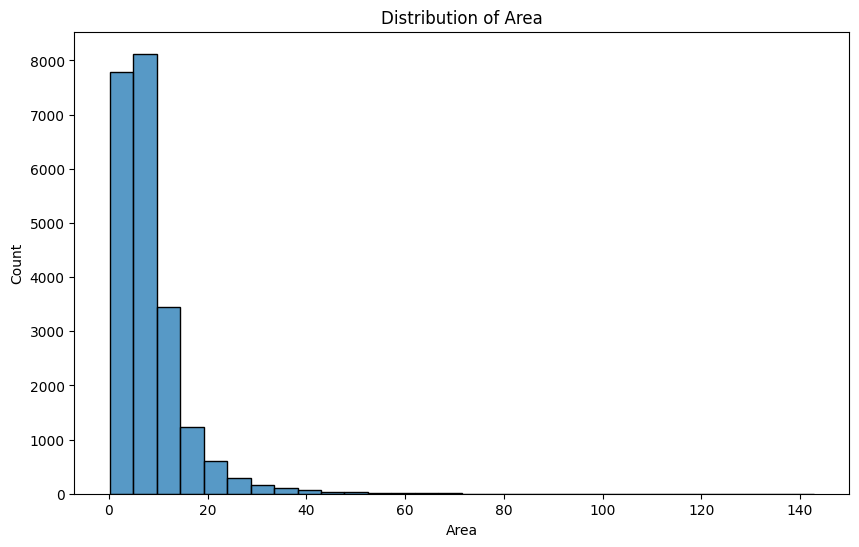

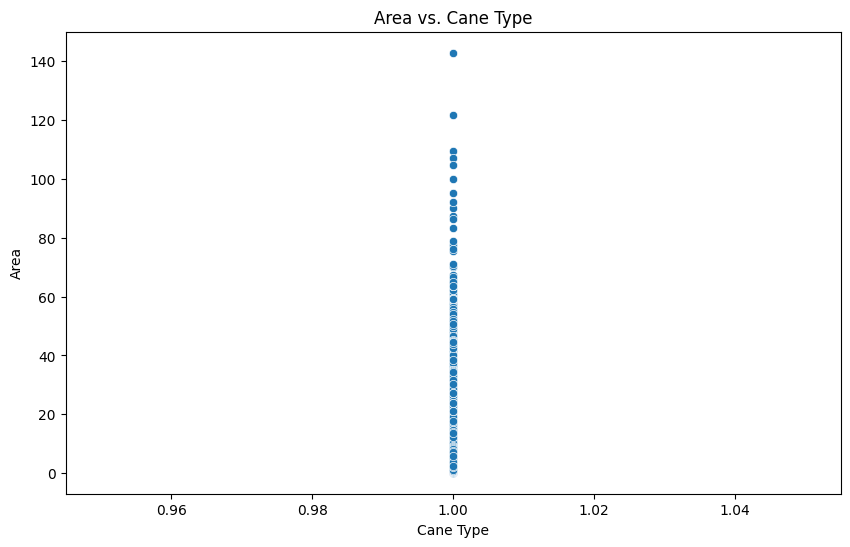

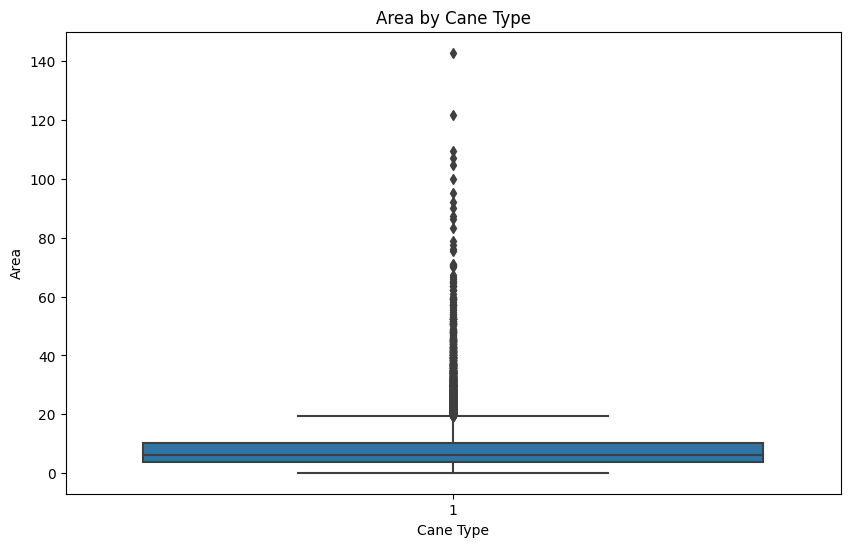

<ipython-input-1-448f231d1918>:48: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


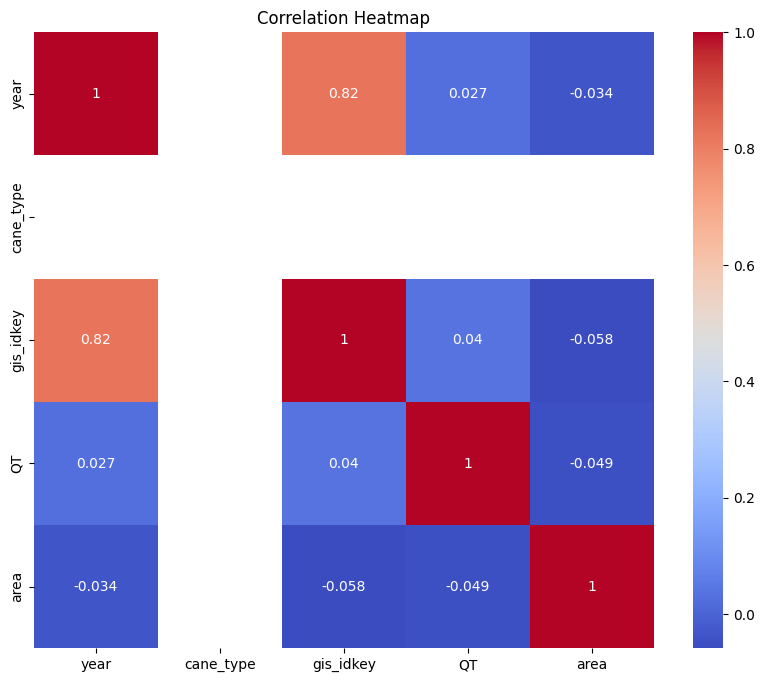

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("https://github.com/Benjamnk/DSE-2/raw/main/cane_area_MPV_TSR_date.xlsx")

# View the first few rows of the dataset
print(df.head())

# Get summary statistics of the numerical columns
print(df.describe())

# Check the data types of the columns
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Perform data visualization

# Histogram of a numerical column
plt.figure(figsize=(10, 6))
sns.histplot(df['area'], bins=30)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Distribution of Area')
plt.show()

# Scatter plot of two numerical columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cane_type', y='area', data=df)
plt.xlabel('Cane Type')
plt.ylabel('Area')
plt.title('Area vs. Cane Type')
plt.show()

# Box plot of a numerical column by a categorical column
plt.figure(figsize=(10, 6))
sns.boxplot(x='cane_type', y='area', data=df)
plt.xlabel('Cane Type')
plt.ylabel('Area')
plt.title('Area by Cane Type')
plt.show()

# Correlation heatmap of numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21964 entries, 0 to 21963
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       21964 non-null  datetime64[ns]
 1   year       21964 non-null  int64         
 2   cane_type  21964 non-null  int64         
 3   gis_idkey  21964 non-null  int64         
 4   QT         21964 non-null  int64         
 5   area       21964 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.0 MB


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel("https://github.com/Benjamnk/DSE-2/raw/main/cane_area_MPV_TSR_date.xlsx")

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Handling outliers
def handle_outliers(data, column):
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Apply outlier handling to the 'area' column
df = handle_outliers(df, 'area')

# Reset the index after cleaning
df = df.reset_index(drop=True)

# Verify the cleaned dataset
print("Cleaned Dataset:")
print(df.head())


Missing Values:
date         0
year         0
cane_type    0
gis_idkey    0
QT           0
area         0
dtype: int64
Cleaned Dataset:
        date  year  cane_type        gis_idkey      QT  area
0 2023-01-31  6667          1  221025135672313  240714  9.36
1 2023-01-31  6667          1  230112138169356  203747  4.74
2 2023-01-31  6667          1  230112138169373  203747  3.46
3 2023-01-31  6667          1  230120138562542  231032  6.45
4 2023-01-31  6667          1  230123138686680  204212  7.18


In [ ]:
# Drop the unwanted columns
columns_to_drop = ['year', 'cane_type', 'gis_idkey', 'QT']
df = df.drop(columns_to_drop, axis=1)

In [ ]:
# dataframe จัดกลุ่มรวมยอด ตามวันที่
df = df.groupby('date').sum()

In [ ]:
df.info

<bound method DataFrame.info of               area
date              
2018-10-03    8.49
2018-10-04   11.71
2018-10-09   17.18
2018-10-10   42.74
2018-10-11    5.51
...            ...
2023-01-27  463.65
2023-01-28  227.35
2023-01-29  117.12
2023-01-30  548.30
2023-01-31  310.37

[544 rows x 1 columns]>

In [ ]:
df

,area
date,
2018-10-03,8.49
2018-10-04,11.71
2018-10-09,17.18
2018-10-10,42.74
2018-10-11,5.51
...,...
2023-01-27,463.65
2023-01-28,227.35
2023-01-29,117.12


<Axes: xlabel='date'>

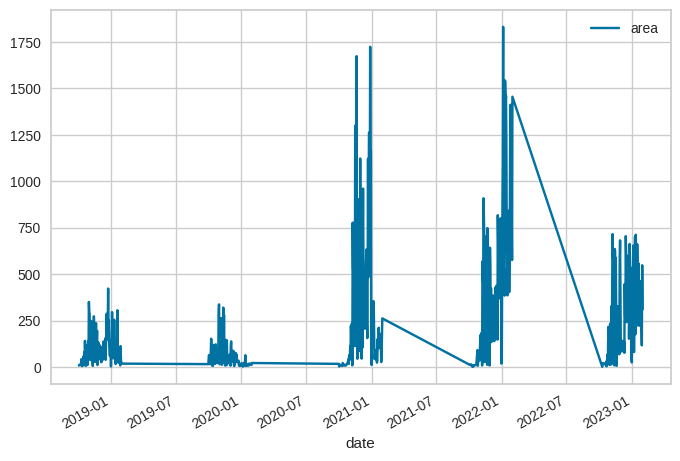

In [ ]:
df.plot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 544 entries, 2018-10-03 to 2023-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    544 non-null    float64
dtypes: float64(1)
memory usage: 8.5 KB


## Time-Series Prediction

Time-Series Prediction ของ PyCaret ไม่ได้ใช้บนพื้นฐานของ Scikit Learn ตามปกติที่เราทำกัน ตัวนี้สร้างบนพื้นฐานของ Facebook Phophet Engine  https://facebook.github.io/prophet/

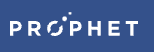

เป็น Library การคาดการณ์ข้อมูลอนุกรมเวลาตามแบบจำลองการเติมซึ่งแนวโน้มที่ไม่เป็นเชิงเส้นเหมาะสมกับฤดูกาลประจำปี รายสัปดาห์ และรายวัน บวกกับเอฟเฟกต์วันหยุด ทำงานได้ดีที่สุดกับอนุกรมเวลาที่มีผลตามฤดูกาลที่แข็งแกร่งและข้อมูลทางประวัติศาสตร์หลายฤดูกาล

Phophet มีความแข็งแกร่งต่อข้อมูลที่ขาดหายไปและการเปลี่ยนแปลงในแนวโน้ม และโดยทั่วไปแล้วจะจัดการกับค่าผิดปกติได้ดี

```
from pycaret.time_series import *
exp_name = setup(data = bitcoin_df, target="market-price",  fh = 12)
```

ค่า Parameter ในการ Setup มีดังนี้

1. *data = dataframe ที่เราต้่องการที่จะนำไป Train (จำเป็นต้องใส่)
1. *target = Column เป้าหมาย (y) ที่เราต้่องการให้ Model เรียนรู้และสามารถ Predict ค่า target ได้อย่างแม่นยำ (จำเป็นต้องใส่)
1. session_id = เลขประจำ session เป็นเลขอะไรก็ได้ เราสามารถใช้อ้างอิงได้ภายหลัง
1. Transform_target = หากข้อมูลเป้าหมาย (y) ไม่เป็น Normal Distribution อาทิเช่นเอนเอียงไปด้านนึง เราควรปรับค่านี้ให้เป็น True ซึ่งระบบจะทำการแปลงข้่อมูลเป้าหมาย (y) ให้เป็น Normal Distribution ให้เรา
1. fh = จำนวนข้อมูลที่เราต้องการที่จะให้ Model ของเรา Forecast
1. seasonal_period: ปรับค่า Seasonal_Period ที่โมเดลใช้เป็นสมมุติฐาน
        * B, C = 5
        * D = 7
        * W = 52
        * M, BM, CBM, MS, BMS, CBMS = 12
        * SM, SMS = 24
        * Q, BQ, QS, BQS = 4
        * A, Y, BA, BY, AS, YS, BAS, BYS = 1
        * H = 24
        * T, min = 60
        * S = 60
1. fold_strategy: การแบ่งข้อมูลในการแยก Training set / Validation set
        * 'expanding'
        * 'rolling' (same as/aliased to 'expanding')
        * 'sliding'

1. fold: int, default = 3 จำนวน Fold ที่ใช้ในการ Cross Validation


### Expanding/Rolling Windows
![](https://i.stack.imgur.com/Zs2Xp.png)

### Sliding Windows
![](https://i.stack.imgur.com/Xd62a.png)

In [ ]:
import pandas as pd
from pycaret.time_series import *

# Load the dataset
df = pd.read_excel("https://github.com/Benjamnk/DSE-2/raw/main/cane_area_MPV_TSR_date.xlsx")

# Drop the unwanted columns
columns_to_drop = ['year', 'cane_type', 'gis_idkey', 'QT']
df = df.drop(columns_to_drop, axis=1)
df = df.groupby('date').sum()
# Drop duplicates from the "date" column
df = df.drop_duplicates(subset='date')

# Set the frequency of the index to daily ('D')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').asfreq('D')

# Interpolate missing values
df = df.interpolate()


# Perform time series setup
exp_name = setup(data=df, target='area', fh=12, fold=10, fold_strategy='sliding')

In [ ]:
import pandas as pd
from pycaret.time_series import *

# Load the dataset
df = pd.read_excel("https://github.com/Benjamnk/DSE-2/raw/main/cane_area_MPV_TSR_date.xlsx")

# Drop the unwanted columns
columns_to_drop = ['year', 'cane_type', 'gis_idkey', 'QT']
df = df.drop(columns_to_drop, axis=1)
df = df.groupby('date').sum()

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Handling outliers
def handle_outliers(data, column):
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Apply outlier handling to the 'area' column
df = handle_outliers(df, 'area')

# Reset the index after cleaning
df = df.reset_index(drop=True)

# Verify the cleaned dataset
print("Cleaned Dataset:")
print(df.head())

# Perform time series setup
exp_name = setup(data=df, target='area', fh=12, fold=10, fold_strategy='sliding')


Missing Values:
area    0
dtype: int64
Cleaned Dataset:
    area
0   8.49
1  11.71
2  17.18
3  63.86
4   5.51


,Description,Value
0,session_id,2850
1,Target,area
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(514, 1)"
5,Transformed data shape,"(514, 1)"
6,Transformed train set shape,"(502, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,SlidingWindowSplitter


In [ ]:
df.head()

,area
0,8.49
1,11.71
2,17.18
3,63.86
4,5.51


## Explore Data
เราสามารถใช้ Plot เพื่อดูข้อมูลได้เลยง่ายๆ



<Axes: >

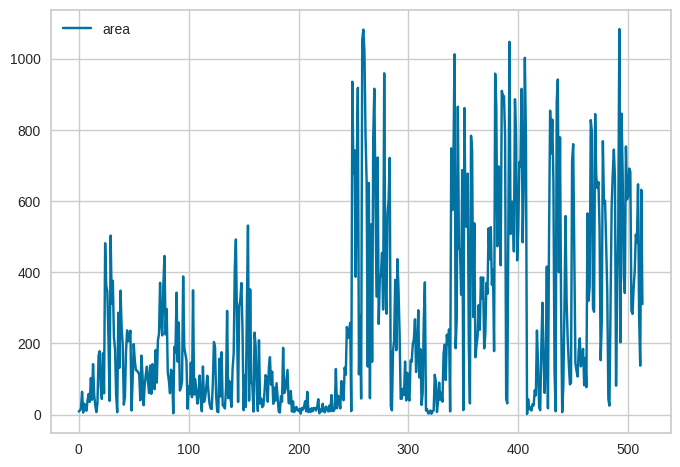

In [ ]:
df.plot()

## Compare Models
เราสามารถใช้่คำสั่ง ``compare_models()`` เพื่อหา Model ที่ดีที่สุดในการทำ Forecasting
* Model = ชื่อ Model
* MAE = Mean Absolute Error (https://en.wikipedia.org/wiki/Mean_absolute_error) ยิ่งน้อยยิ่งดี
* MSE = Mean Square Error (https://en.wikipedia.org/wiki/Mean_squared_error) ยิ่งน้อยยิ่งดี
* RMSE = Root Mean Square Error (https://en.wikipedia.org/wiki/Root-mean-square_deviation) ยิ่งน้อยยิ่งดี
* R2 = Coefficient of determination (https://en.wikipedia.org/wiki/Coefficient_of_determination) ยิ่งเข้าใกล้ 1 ยิ่งดี
* RMSLE - Root Mean Squared Logaritmic Error (RMSLE) (https://hrngok.github.io/posts/metrics/#:~:text=Root%20Mean%20Squared%20Logaritmic%20Error%20(RMSLE)&text=It%20is%20the%20Root%20Mean,possible%200%20(zero)%20values.) ยิ่งน้อยยิ่งดี
* MAPE - Mean absolute percentage error
 (https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) ยิ่งน้อยยิ้งดี
* TT - Time Taken (Sec) เวลาในการใช้

In [ ]:
best = compare_models(fold=1, round=1)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.0,0.9,172.0,225.0,0.4,0.3,0.1,0.5
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.1,0.9,190.6,234.6,0.4,0.3,0.0,0.9
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,1.2,0.9,200.5,241.2,0.4,0.4,-0.0,0.8
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.2,0.9,205.3,247.2,0.4,0.4,-0.1,0.5
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.2,1.0,211.3,255.0,0.4,0.4,-0.1,0.4
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.3,1.0,219.7,270.0,0.4,0.4,-0.3,0.8
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.3,1.0,220.1,270.0,0.4,0.4,-0.3,0.9
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.3,1.0,220.1,270.0,0.4,0.4,-0.3,0.6
auto_arima,Auto ARIMA,1.3,1.1,227.9,281.6,0.4,0.4,-0.4,26.5
exp_smooth,Exponential Smoothing,1.3,1.0,214.5,259.9,0.4,0.4,-0.2,0.6


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

## Create Model

เราสามารถใช้่คำสั่ง create_model("{ชื่อ_Model}") เพื่อสร้าง model ตามที่เราต้องการ

* 'naive' - Naive Forecaster
* 'grand_means' - Grand Means Forecaster
* 'snaive' - Seasonal Naive Forecaster (disabled when seasonal_period = 1)
* 'polytrend' - Polynomial Trend Forecaster
* 'arima' - ARIMA family of models (ARIMA, SARIMA, SARIMAX)
* 'auto_arima' - Auto ARIMA
* 'exp_smooth' - Exponential Smoothing
* 'croston' - Croston Forecaster
* 'ets' - ETS
* 'theta' - Theta Forecaster
* 'tbats' - TBATS
* 'bats' - BATS
* 'prophet' - Prophet Forecaster
* 'lr_cds_dt' - Linear w/ Cond. Deseasonalize & Detrending
* 'en_cds_dt' - Elastic Net w/ Cond. Deseasonalize & Detrending
* 'ridge_cds_dt' - Ridge w/ Cond. Deseasonalize & Detrending
* 'lasso_cds_dt' - Lasso w/ Cond. Deseasonalize & Detrending
* 'lar_cds_dt' -   Least Angular Regressor w/ Cond. Deseasonalize & Detrending
* 'llar_cds_dt' - Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending
* 'br_cds_dt' - Bayesian Ridge w/ Cond. Deseasonalize & Deseasonalize & Detrending
* 'huber_cds_dt' - Huber w/ Cond. Deseasonalize & Detrending
* 'par_cds_dt' - Passive Aggressive w/ Cond. Deseasonalize & Detrending
* 'omp_cds_dt' - Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending
* 'knn_cds_dt' - K Neighbors w/ Cond. Deseasonalize & Detrending
* 'dt_cds_dt' - Decision Tree w/ Cond. Deseasonalize & Detrending
* 'rf_cds_dt' - Random Forest w/ Cond. Deseasonalize & Detrending
* 'et_cds_dt' - Extra Trees w/ Cond. Deseasonalize & Detrending
* 'gbr_cds_dt' - Gradient Boosting w/ Cond. Deseasonalize & Detrending
* 'ada_cds_dt' - AdaBoost w/ Cond. Deseasonalize & Detrending
* 'lightgbm_cds_dt' - Light Gradient Boosting w/ Cond. Deseasonalize & Detrending
* 'catboost_cds_dt' - CatBoost w/ Cond. Deseasonalize & Detrending


In [ ]:
ada_cds_dt_model = create_model("ada_cds_dt")

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,381.0000,1.8642,1.3986,266.0540,313.5969,2.3022,0.5670,0.0056
1,393.0000,1.0395,0.8300,155.8328,191.3976,0.2231,0.2492,-0.5460
2,405.0000,3.2052,2.1574,488.1014,502.7338,44.9711,1.5025,-1.4536
3,417.0000,1.3180,0.9665,213.9142,242.6526,5.9913,0.8961,-0.0288
4,429.0000,1.9629,1.4156,324.7212,360.4749,13.2957,0.8025,-0.0749
5,441.0000,1.7538,1.3133,304.9261,348.2649,2.0996,0.7933,-1.2629
6,453.0000,1.0333,0.7410,183.1850,199.3466,1.3554,0.7080,-1.1873
7,465.0000,1.3619,1.0053,242.8845,272.7488,0.5168,0.4899,-0.3226
8,477.0000,1.2258,1.1682,228.3923,326.8436,4.0929,0.5819,-0.6948
9,489.0000,0.8888,0.8300,170.0949,236.8203,0.4018,0.2984,0.0090


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Prediction

In [ ]:
predictions = predict_model(ada_cds_dt_model)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,AdaBoostRegressor,1.3418,1.0486,232.8223,274.5614,0.8727,0.4976,-1.7571


In [ ]:
predictions

,y_pred
502,560.6859
503,555.5276
504,666.2714
505,641.3610
506,626.0450
507,633.1292
508,596.7875
509,591.6293
510,671.1468
511,633.3405


In [ ]:
df[-30:]

,area
484,297.69
485,586.00
486,675.21
487,744.45
488,665.05
489,81.03
490,329.11
491,522.68
492,1083.19
493,203.02


In [ ]:
predictions.insert(1, "area", df[-30:], True)


In [ ]:
predictions

,y_pred
502,560.6859
503,555.5276
504,666.2714
505,641.3610
506,626.0450
507,633.1292
508,596.7875
509,591.6293
510,671.1468
511,633.3405


<Axes: >

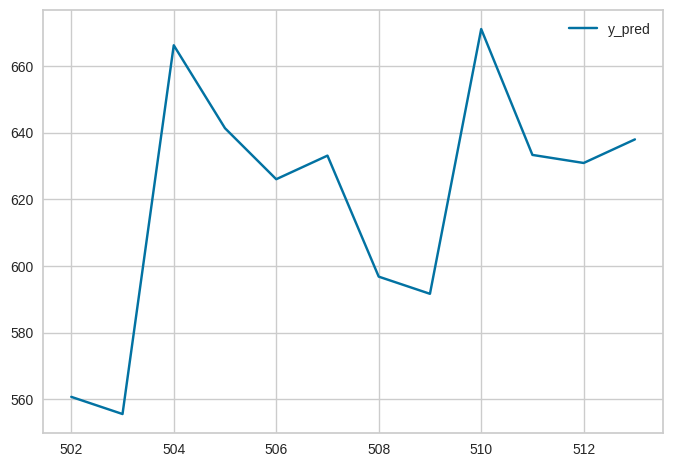

In [ ]:
predictions.plot()

## Plot Model

``plot_model({model}, plot={plot_name})``

default is changed to 'forecast'. List of available plots (ID - Name):
* 'ts' - Time Series Plot
* 'train_test_split' - Train Test Split
* 'cv' - Cross Validation
* 'acf' - Auto Correlation (ACF)
* 'pacf' - Partial Auto Correlation (PACF)
* 'decomp' - Classical Decomposition
* 'decomp_stl' - STL Decomposition
* 'diagnostics' - Diagnostics Plot
* 'diff' - Difference Plot
* 'periodogram' - Frequency Components (Periodogram)
* 'fft' - Frequency Components (FFT)
* 'ccf' - Cross Correlation (CCF)
* 'forecast' - "Out-of-Sample" Forecast Plot
* 'insample' - "In-Sample" Forecast Plot
* 'residuals' - Residuals Plot

In [ ]:
plot_model(ada_cds_dt_model, "ts")

In [ ]:
plot_model(ada_cds_dt_model, "forecast")

In [ ]:
plot_model(arima_model, "train_test_split")

In [ ]:
tuned_arima_model = tune_model(arima_model)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,381.0000,1.7880,1.3922,255.1739,312.1402,2.6993,0.5254,0.0149
1,393.0000,0.8694,0.6986,130.3374,161.0957,0.1912,0.2036,-0.0952
2,405.0000,3.6205,2.4660,551.3487,574.6413,54.7888,1.5029,-2.2057
3,417.0000,1.1055,1.0775,179.4353,270.5107,1.8151,0.9488,-0.2786
4,429.0000,1.9728,1.3713,326.3673,349.1882,10.7412,0.8524,-0.0087
5,441.0000,1.0572,0.8796,183.8119,233.2607,0.7638,0.6024,-0.0151
6,453.0000,0.8921,0.6448,158.1505,173.4471,1.1536,0.6507,-0.6559
7,465.0000,1.6514,1.2732,294.5056,345.4142,0.5055,0.6127,-1.1211
8,477.0000,1.1288,0.9371,210.3252,262.1670,3.1653,0.5959,-0.0904
9,489.0000,1.1490,0.9242,219.8998,263.6708,0.4132,0.4014,-0.2284


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   35.7s finished


### Finalize, Save Model and Load Model

เมื่อเราได้ Model ที่พร้อมแล้ว เราสามารถทำ ``finalize_model({Model})`` **เพื่อทำการ Train Model บน Dataset ทั้่งหมด (ALL) ใหม่** เพื่อให้โมเดลได้เรียนรู้บน Data ให้ได้มากที่สุดบนรูปแบบ Estimator (Model) และ Hyperparamters ที่เราได้เลือกและได้กำหนดค่าไว้ในตัวแปร {Model}

**Save model**

``save_model({Final_Model}, "ชื่อไฟล์")``
และ

**Load Model**

``{Model} = load_model("ชื่อไฟล์")``
เหมือนตัวอื่นๆ

In [ ]:
final_best = finalize_model(best)

In [ ]:
save_model(final_best, "snaive_bitcoin_best")

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                NaiveForecaster(sp=7,
                                                                                strategy='last',
                                                                                window_length=None))]))]), model_name=snaive_bitcoin_best, prep_pipe_=None, verbose=True, use_case=MLUsecase.TIME_SERIES, kwargs={})
INFO:logs:Adding model into prep_pipe
INFO:logs:snaive_bitcoin_best.pkl saved in current working directory
INFO:logs:ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                NaiveForecaster(sp=7,
                                                                                strategy='last',
           

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 NaiveForecaster(sp=7,
                                                                                 strategy='last',
                                                                                 window_length=None))]))]),
 'snaive_bitcoin_best.pkl')

In [ ]:
loaded_snaive_bitcoin = load_model("snaive_bitcoin_best")

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=snaive_bitcoin_best, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
loaded_snaive_bitcoin

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                NaiveForecaster(sp=7,
                                                                                strategy='last',
                                                                                window_length=None))]))])

## Exercise

เรามาลอง Predict ข้อมูลที่มี Pattern ชัดเจนมากกว่า Bitcoin กันเถอะ ข้อมูลคุณภาพอากาศ

![](https://www.researchgate.net/profile/Irena-Markovska-2/publication/340899809/figure/fig2/AS:883882824065027@1587745495992/Dependences-between-criterion-COGT-and-criteria-PT08S1CO-C6H6GT-PT08S2NMHC.ppm)

ปริมาณสารพิษในอากาศที่จับได้ ประกอบไปด้วย
* True hourly averaged concentration CO in mg/m3 - CO(GT)
* PT08.S1 (tin oxide) hourly averaged sensor response - PT08.S1(CO)
* True hourly averaged Benzene concentration in microg/m3 - C6H6(GT)
* PT08.S2 (titania) hourly averaged sensor response - PT08.S2(NMHC)
* True hourly averaged NOx concentration in ppb - NOx(GT)
* PT08.S3 (tungsten oxide) hourly averaged sensor response - PT08.S3(NOx)* True hourly averaged NO2 concentration in microg/m3 - NO2(GT);8)
* PT08.S4 (tungsten oxide) hourly averaged sensor response - PT08.S4(NO2)
* PT08.S5 (indium oxide) hourly averaged sensor response - PT08.S5(O3);
* Temperature in °C - T
* Relative Humidity (%) - RH
* Absolute Humidity - AH

(PDF) Application of the InterCriteria Analysis Over Air Quality Data. Available from: https://www.researchgate.net/publication/318029588_Application_of_the_InterCriteria_Analysis_Over_Air_Quality_Data [accessed Aug 14 2022].


In [ ]:
from pycaret.datasets import get_data
airquality = get_data('airquality')

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [ ]:
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [ ]:
# รวม Date+Time เป็น datetime
airquality["datetime"] = pd.to_datetime(airquality.Date.astype(str) + ' ' + airquality.Time.astype(str))

In [ ]:
airquality = airquality.drop(["Date","Time"], axis=1)

In [ ]:
airquality

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004-03-10 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568,2005-04-04 10:00:00
9353,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119,2005-04-04 11:00:00
9354,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406,2005-04-04 12:00:00
9355,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139,2005-04-04 13:00:00


In [ ]:
# dataframe จัดกลุ่มรวมยอด ตามวันที่
airquality=airquality.groupby('datetime',as_index=True).sum()
#แปลง index ที่เป็นอยู่ date ให้เป็น date_time
airquality.index=pd.to_datetime(airquality.index)

In [ ]:
airquality

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
2005-04-04 11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
2005-04-04 12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406


In [ ]:
from pycaret.time_series import *
exp_name = setup(data = airquality, target="CO(GT)",  fh = 12)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: a73c
INFO:logs:self.variable_keys: {'_gpu_n_jobs_param', 'y', 'seasonality_present', '_all_metrics', 'y_transformed', 'y_test', 'exp_name_log', 'n_jobs_param', 'X_test', 'index_type', 'USI', 'X_transformed', 'seasonal_period', '_ml_usecase', 'enforce_pi', '_all_models_internal', '_all_models', 'X_train_transformed', 'y_train', 'seed', 'data', 'approach_type', 'gpu_param', 'exp_id', 'model_engines', 'X', 'display_container', 'memory', 'X_test_transformed', 'fh', 'enforce_exogenous', 'variable_keys', 'exogenous_present', 'y_train_transformed', 'fold_generator', 'html_param', 'X_train', 'logging_param', '_available_plots', 'log_plots_param', 'strictly_positive', 'all_sp_values', 'master_model_container', 'primary_sp_to_use', 'pipeline', 'y_test_transformed', 'fold_param', 'idx'}
INFO:log

,Description,Value
0,session_id,296
1,Target,CO(GT)
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(9357, 13)"
5,Transformed data shape,"(9357, 13)"
6,Transformed train set shape,"(9345, 13)"
7,Transformed test set shape,"(12, 13)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


INFO:logs:Engine successfully changes for model 'auto_arima' to 'pmdarima'.
INFO:logs:Soft dependency imported: prophet: 1.0
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: prophet: 1.0
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: prophet: 1.0
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: catboost: 1.0.6
INFO:logs:Soft dependency imported: prophet: 1.0
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft dependency imported: xgboost: 0.90
INFO:logs:Soft d

In [ ]:
# Start your work here....

# Clustering

คือการจัดกลุ่มข้อมูลโดยอัตโนมัติ เป็นรูปแบบ Unsupervised Learning โดยไม่ต้องมีค่า y (target class) มักจะใช้ในงานจัดกลุ่มลูกค้า (Customers Segmentation) หรือจัดกลุ่มเนื้อหาเอกสารหรือบทความต่างๆ (Document Grouping) เป็นต้น

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.clustering import *
from sklearn.datasets import make_blobs
mpl.rcParams['figure.dpi'] = 100

## Synthetic Dataset

รอบนี้เราลองสร้าง Dataset ปลอมๆ ขึ้นมาเอง เพื่อให้รู้ว่าการสร้าง Dataset ไม่จำเป็นต้องมาจากที่มีอยู่แล้วก็ได้

In [ ]:
# Generating dataset

cols = ['column1', 'column2', 'column3',
        'column4', 'column5']
arr = make_blobs(n_samples = 1000, n_features = 5, random_state = 20,
                 centers = 3, cluster_std = 1)
data = pd.DataFrame(data = arr[0], columns = cols)
data.head()

,column1,column2,column3,column4,column5
0,2.916076,6.504857,8.246937,6.185952,-9.776481
1,-2.044462,5.282757,5.265467,7.487941,6.347177
2,3.439328,-3.020505,-0.783592,2.907385,-6.117881
3,2.155568,8.776136,5.788650,5.751763,-7.609132
4,-6.650020,5.458227,5.848407,7.150584,5.992247


ในรอบนี้ เราสร้างข้อมูลจำนวน 1000 แถว มี 5 Features (Columns) โดยมีกระจุกตัวกันอยู่ 3 กลุ่ม (Clusters) การใช้ชุดข้อมูลสังเคราะห์เพื่อทดสอบโมเดลการทำคลัสเตอร์ของเรามีประโยชน์หลายประการ ข้อได้เปรียบหลักคือเราทราบจำนวนคลัสเตอร์จริงแล้ว ดังนั้นเราจึงสามารถประเมินประสิทธิภาพของโมเดลได้อย่างง่ายดาย โดยทั่วไป ข้อมูลในโลกแห่งความเป็นจริงจะซับซ้อนกว่าเนื่องจากไม่มีคลัสเตอร์ที่แยกจากกันอย่างชัดเจนเสมอไป

## Explore Data
เราลองมาดู Data เรากันว่าหน้าตาเป็นอย่างไร

### Histogram
เนื่องจากมี 3 Clusters ที่กระจุกตัวแตกต่างกัน ทำให้เราเห็นข้อมูลในแต่ละ Column มีจุด Peak อยู่ 2-3 จุด หรือเรียกว่า (bimodal หรือ multimodal)

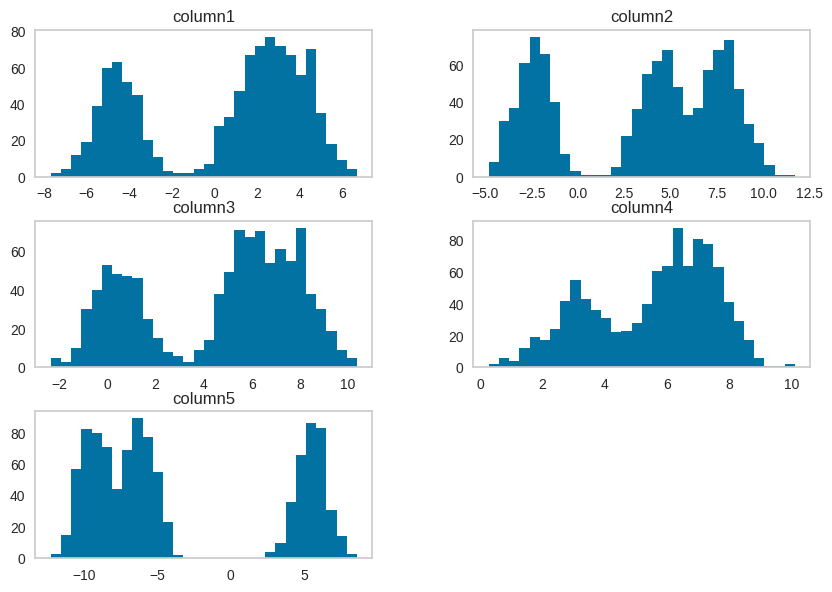

In [ ]:
# Plotting histogram

data.hist(bins = 30, figsize = (10,7), grid = False)
plt.show()

### Color-encoded Matrix

ดูความสัมพันธ์ระหว่าง Feature X ด้วย ``corr()`` และสร้างเป็น Heatmap มาให้ดู
* 1 ไปด้วยกันเสมอ
* -1 สวนทางกันเสมอ

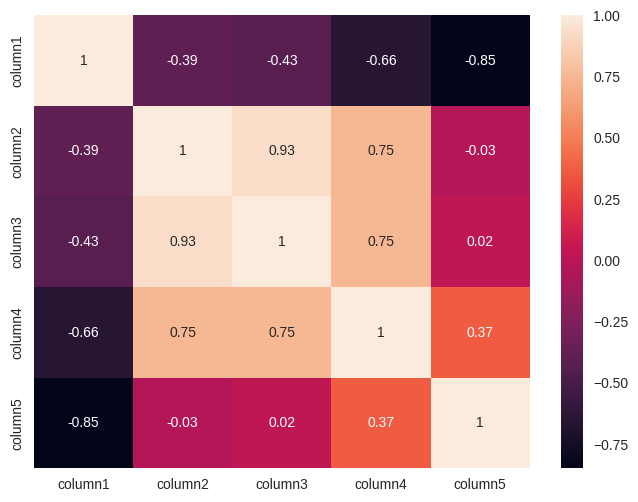

In [ ]:
# Plotting color-encoded matrix

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr().round(decimals=2), annot=True)
plt.show()

สังเกตุได้ว่า Col2, Col3 จะมี Correlation ใกล้เคียงกันสูง (แต่อย่างไรก็ตามก็ขึ้นกับการ Random ณ ขณะนั้่นด้่วย)

### การดู Scatter plot เพื่อดู ความสัมพันธ์ระหว่าง Feature X

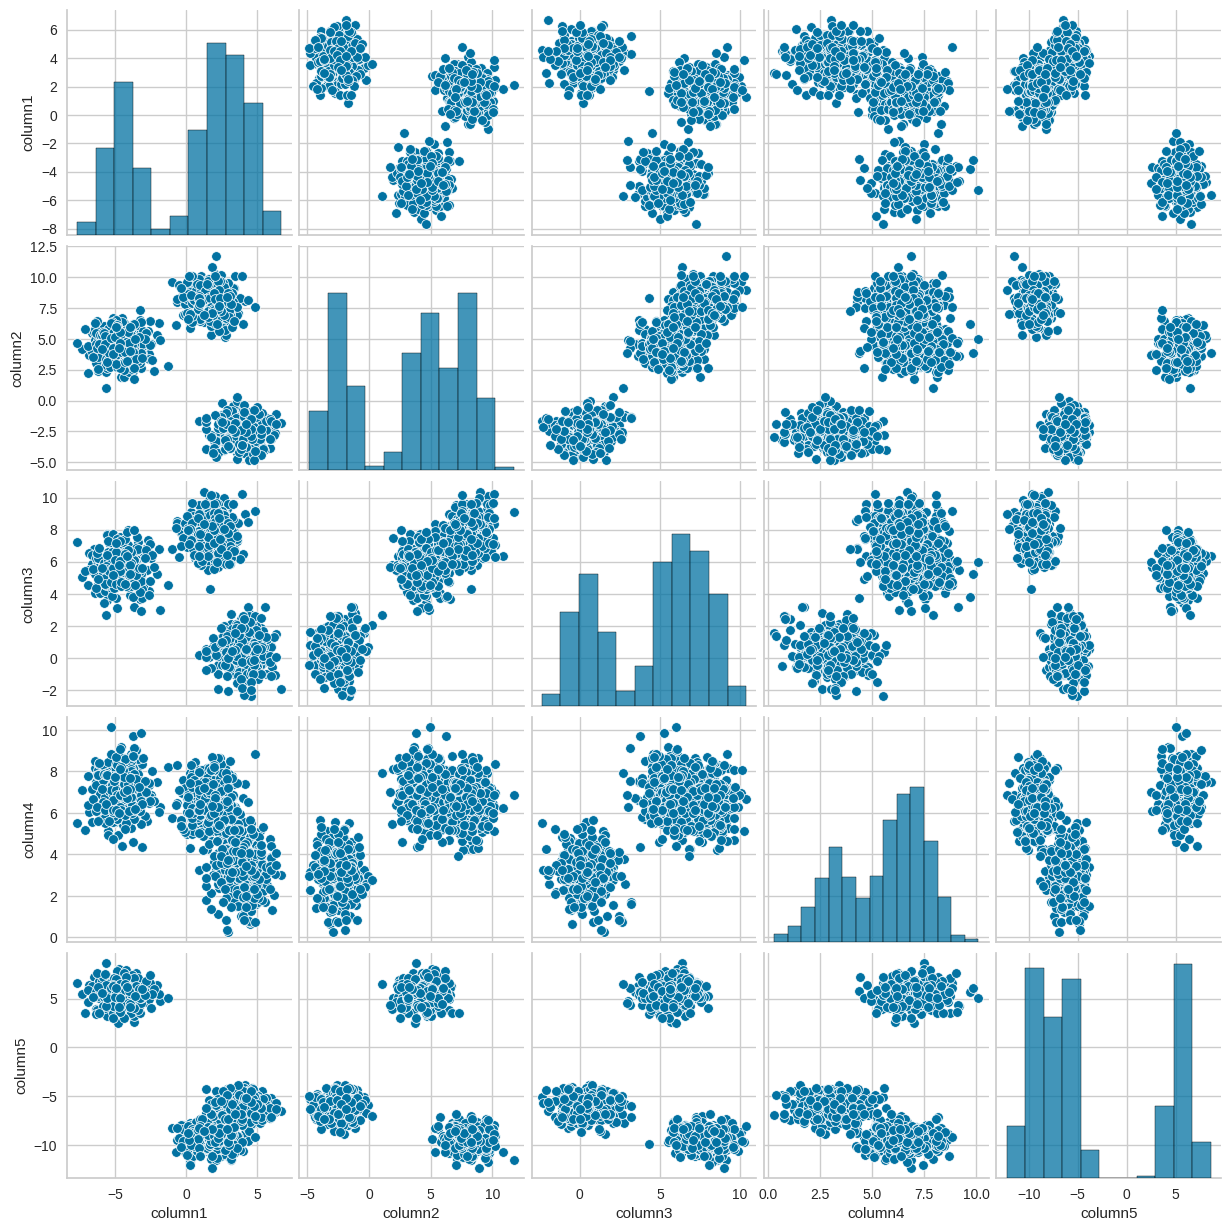

In [ ]:
sns.pairplot(data)
plt.show()

## Clustering Prediction

การ Setup ของ Clustering จะมีความแตกต่างจากตัวอื่นๆ ดังนี้

1. *data = dataframe ที่เราต้่องการที่จะนำไป Train (จำเป็นต้องใส่)
1. session_id = เลขประจำ session เป็นเลขอะไรก็ได้ เราสามารถใช้อ้างอิงได้ภายหลัง
1. pca: bool, default = False = เปิดการใช้ PCA เพื่อลดจำนวน Features ลงหรือไม่
1.  pca_method: str, default = 'linear' วิธีการทำ PCA, Possible values are:
    - 'linear': Uses Singular Value  Decomposition.
    - 'kernel': Dimensionality reduction through the use of RBF kernel.
    - 'incremental': Similar to 'linear', but more efficient for large datasets.
1. pca_components: int, float, str or None, default = None จำนวนของ pca ที่ต้องการเก็บไว้. This parameter is ignored when `pca=False`.
    - If None: All components are kept.
    - If int: Absolute number of components.
    - If "mle": Minka’s MLE is used to guess the dimension (ony for pca_method='linear').
1. Transformation = หากข้อมูลไม่เป็น Normal Distribution อาทิเช่นเอนเอียงไปด้านนึง เราควรปรับค่านี้ให้เป็น True ซึ่งระบบจะทำการแปลงข้่อมูลให้เป็น Normal Distribution ให้เรา
1. Normalize = ทำการแปลงค่า numeric_features ทั้งหมดให้อยู่ระหว่าง -e..e โดยใช้หลักการของ z-score = (x - mean) / standard deviation


In [ ]:
from pycaret.clustering import *
# PyCaret environment setup.Setting different parameters in setup() function
# to prepare model training and deployment data.

cluster = setup(data, session_id = 7652)

INFO:logs:PyCaret ClusteringExperiment
INFO:logs:Logging name: cluster-default-name
INFO:logs:ML Usecase: MLUsecase.CLUSTERING
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: f6c1
INFO:logs:self.variable_keys: {'exp_id', '_gpu_n_jobs_param', 'display_container', 'memory', 'X', '_all_metrics', 'variable_keys', 'exp_name_log', 'n_jobs_param', 'USI', 'logging_param', '_available_plots', '_ml_usecase', 'log_plots_param', '_all_models_internal', 'master_model_container', '_all_models', 'idx', 'seed', 'data', 'pipeline', 'gpu_param', 'html_param'}
INFO:logs:Checking environment
INFO:logs:python_version: 3.7.13
INFO:logs:python_build: ('default', 'Apr 24 2022 01:04:09')
INFO:logs:machine: x86_64
INFO:logs:platform: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
INFO:logs:Memory: svmem(total=13617745920, available=11611111424, percent=14.7, used=1977847808, free=9328275456, active=2347229184, inactive=1563693056, buffers=221483008, cached=2090139648, shared=13148

,Description,Value
0,Session id,7652
1,Original data shape,"(1000, 5)"
2,Transformed data shape,"(1000, 5)"
3,Numeric features,5
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,constant
8,Low variance threshold,0
9,CPU Jobs,-1


'kmodes' is a soft dependency and not included in the pycaret installation. Please run: `pip install kmodes` to install.
Alternately, you can install this by running `pip install pycaret[models]`
'kmodes' is a soft dependency and not included in the pycaret installation. Please run: `pip install kmodes` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:setup() successfully completed in 0.56s...............


## Compare Model?
Compare Model ไม่สามารถทำได้ เพราะเนื่องจากเราไม่มีเฉลย เพราะฉะนั้นเราต้องไล่ Create_model ไปแล้วดูผลของการจัดกลุ่มด้วยตาของมนุษย์แทน

## Create Model
สร้าง Model ด้วยคำสั่ง ``create_model({ชื่อ Model}, num_clusters={จำนวน Cluster})`` หากเราไม่กำหนด ``num_clusters`` จะมีค่า Default = 4

* 'kmeans' - K-Means Clustering
* 'ap' - Affinity Propagation
* 'meanshift' - Mean shift Clustering
* 'sc' - Spectral Clustering
* 'hclust' - Agglomerative Clustering
* 'dbscan' - Density-Based Spatial Clustering
* 'optics' - OPTICS Clustering
* 'birch' - Birch Clustering
* 'kmodes' - K-Modes Clustering

In [ ]:
kmeans_model = create_model("kmeans")

INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, estimator=kmeans, num_clusters=4, fraction=0.05, ground_truth=None, round=4, fit_kwargs=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, raise_num_clusters=False, display=None, kwargs={})
INFO:logs:Checking exceptions


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5843,6047.8548,1.2212,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Importing untrained model
INFO:logs:K-Means Clustering Imported succesfully
INFO:logs:Fitting Model
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, random_state=7652, tol=0.0001, verbose=0)
INFO:logs:create_models() succesfully completed......................................


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, random_state=7652, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


### ค่า Error ของการทำ Clustering

ค่า Error จากการทำ Clustering นั้น ไม่ได้เกิดจาก y label (เฉลย) ซึ่งข้อมูลนี้มันไม่มี แต่มันเกิดจากพอเค้าลอง Assign Cluster ให้แต่ละ Dataset แล้วดูว่าคุณลักษณะของ Cluster นั้น ดีหรือแย่อย่างไร อาทิเช่น ถ้าทุกจุดเกาะกลุ่มกันแน่นจนเป็นจุดเดียวกัน = ดี , แต่ถ้าหากกระจายไปปนกับ cluster อื่นๆ = ไม่ดี โดยมีหลักในการดูดังนี้

* Silhouette - มีค่าระหว่าง -1 ถึง 1 - ยิ่งเยอะยิ่งดี ถ้า 1 ทุกจุดใน Cluster มีคุณลักษณะตรงกับจุดอื่นๆใน Cluster - https://en.wikipedia.org/wiki/Silhouette_(clustering)
* Calinski-Harabasz - สัดส่วนระยะห่าง (Distance Ratio) ของจุดระหว่างจุดใน Cluster กับ Cluster อื่นๆ หารด้วย จุดใน Cluster กับ Cluster ของตน - คะแนนยิ่งเยอะยิ่งดี
* Davies-Bouldin - สัดส่วนระยะห่าง (Distance Ratio) ของ จุดใน Cluster กับ Cluster ของตน หารด้วย จุดระหว่างจุดใน Cluster กับ Cluster อื่นๆ - คะแนนยิ่งน้อยยิ่งดี
* Homogeneity - มีค่าระหว่าง 0 ถึง 1 - ยิ่งเยอะยิ่งดี  - ในกรณีมี Class y เราสามารถวัดได้ว่า มีจุดไหนที่ถูก Cluster ได้มากกว่า 2 จุดหรือไม่ ถ้าไม่มีเลย แสดงว่าแบ่ง Cluster ได้ดี ค่่า Homongenity = 1.0
* Rand Index - มีค่าระหว่าง 0 ถึง 1 - ยิ่งเยอะยิ่งดี  - ในกรณีมี Class y ความแม่นยำของการเลือก Cluster ที่ถูกต้องให้แต่ละจุด (เหมือน Accuracy ใน Classification)
* Completeness  - มีค่าระหว่าง 0 ถึง 1 - ยิ่งเยอะยิ่งดี  - ในกรณีมี Class y จำนวนจุดในข้อมูลที่เฉลยหากได้อยู่ Cluster เดียวกันหมดได้จะค่าเป็น 1 ดูว่าสามารถเก็บมาครบได้หรือไม่ (เหมือน Recall ใน Classification)

## Plot Model

``plot_model({ModelVar}, '{PlotName}')``

* 'cluster' - Cluster PCA Plot (2d)
* 'tsne' - Cluster t-SNE (3d)
* 'elbow' - Elbow Plot
* 'silhouette' - Silhouette Plot
* 'distance' - Distance Plot
* 'distribution' - Distribution Plot

### Elbow Plot
ใช้หาจำนวน Cluster ที่ดีที่สุดบน Dataset

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=elbow, fold=None, use_train_data=False, verbose=True, display=None, display_format=None, estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, random_state=7652, tol=0.0001, verbose=0), feature_name=None, fit_kwargs=None, groups=None, label=False, plot_kwargs=None, save=False, scale=1, self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, system=True)
INFO:logs:Checking exceptions


INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: elbow
INFO:logs:Fitting Model


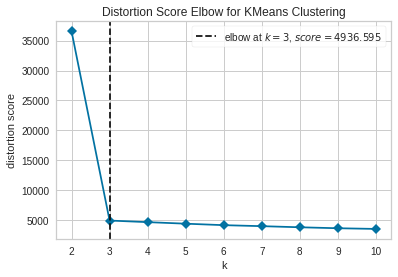

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


In [ ]:
# Plotting the model

plot_model(kmeans_model, 'elbow')

เมื่อเรารู้แล้่วว่าจำนวน Cluster ที่ดีที่สุดคือ 3 เราก็ทำการ Train ใหม่ให้แม่นยำขึ้น

In [ ]:
kmeans_model = create_model('kmeans', num_clusters = 3)

INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, estimator=kmeans, num_clusters=3, fraction=0.05, ground_truth=None, round=4, fit_kwargs=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, raise_num_clusters=False, display=None, kwargs={})
INFO:logs:Checking exceptions


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7972,8565.5114,0.2904,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Importing untrained model
INFO:logs:K-Means Clustering Imported succesfully
INFO:logs:Fitting Model
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0)
INFO:logs:create_models() succesfully completed......................................


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


สังเกตุได้ว่า Error Matrices ทุกตัวดีขึ้น อย่างมีนัยสำคัญ

### PCA Plot

ทำการ Dimensionally Reduction โดยการใช้ Principal Component Analysis (PCA) จาก 5 มิติ -> 2 มิติ เพื่อให้ทำการแยกแยะง่ายขึ้น

In [ ]:
# Plotting PCA plot

plot_model(kmeans_model, 'cluster')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=cluster, fold=None, use_train_data=False, verbose=True, display=None, display_format=None, estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), feature_name=None, fit_kwargs=None, groups=None, label=False, plot_kwargs=None, save=False, scale=1, self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, system=True)
INFO:logs:Checking exceptions


INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: cluster
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), transformation=True, score=True, verbose=False)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:Transformation parameter set to True. Assigned clusters are attached on transformed dataset.
INFO:logs:(1000, 6)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting PCA()
INFO:logs:Sorting dataframe
INFO:logs:Rendering V

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


### TSNE Plot

In [ ]:
# Plot แบบ 3 มิติด้่วย tsne แต่ใช้เวลารันนาน
plot_model(kmeans_model, 'tsne')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=tsne, fold=None, use_train_data=False, verbose=True, display=None, display_format=None, estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), feature_name=None, fit_kwargs=None, groups=None, label=False, plot_kwargs=None, save=False, scale=1, self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, system=True)
INFO:logs:Checking exceptions


INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: tsne
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), transformation=True, score=False, verbose=False)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:Transformation parameter set to True. Assigned clusters are attached on transformed dataset.
INFO:logs:(1000, 6)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting TSNE()

The default initialization in TSNE will change fr

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


### Silhouette Plot

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=silhouette, fold=None, use_train_data=False, verbose=True, display=None, display_format=None, estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), feature_name=None, fit_kwargs=None, groups=None, label=False, plot_kwargs=None, save=False, scale=1, self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, system=True)
INFO:logs:Checking exceptions


INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: silhouette
INFO:logs:Fitting Model

X does not have valid feature names, but KMeans was fitted with feature names




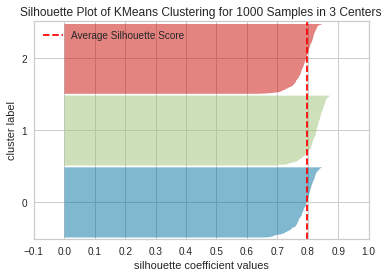

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


In [ ]:
plot_model(kmeans_model, 'silhouette')

### Distance Plot

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=distance, fold=None, use_train_data=False, verbose=True, display=None, display_format=None, estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), feature_name=None, fit_kwargs=None, groups=None, label=False, plot_kwargs=None, save=False, scale=1, self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, system=True)
INFO:logs:Checking exceptions


INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: distance
INFO:logs:Fitting Model

X does not have valid feature names, but KMeans was fitted with feature names




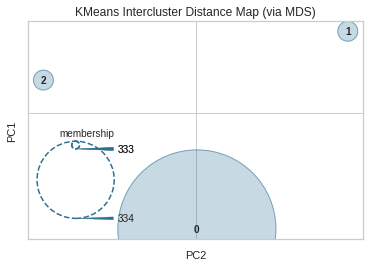

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


In [ ]:
plot_model(kmeans_model, 'distance')

### Distribution Plot

In [ ]:
plot_model(kmeans_model, 'distribution')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(plot=distribution, fold=None, use_train_data=False, verbose=True, display=None, display_format=None, estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), feature_name=None, fit_kwargs=None, groups=None, label=False, plot_kwargs=None, save=False, scale=1, self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, system=True)
INFO:logs:Checking exceptions


INFO:logs:Preloading libraries
INFO:logs:Copying training dataset
INFO:logs:Plot type: distribution
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), transformation=False, score=True, verbose=False)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(1000, 6)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Sorting dataframe
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() successfully completed......................................


## Evaluate Model

In [ ]:
evaluate_model(kmeans_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7cb13890>, estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## เรามาลอง Setup ใหม่แบบเปิดให้ PCA ให้เราได้กันเถอะ จะได้รู้ว่าดีขึ้นแค่ไหน

In [ ]:
from pycaret.clustering import *
# PyCaret environment setup.Setting different parameters in setup() function
# to prepare model training and deployment data.

cluster = setup(data, session_id = 7653, pca=True, pca_method="linear")

INFO:logs:PyCaret ClusteringExperiment
INFO:logs:Logging name: cluster-default-name
INFO:logs:ML Usecase: MLUsecase.CLUSTERING
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: 83af
INFO:logs:self.variable_keys: {'exp_id', '_gpu_n_jobs_param', 'display_container', 'memory', 'X', '_all_metrics', 'variable_keys', 'exp_name_log', 'n_jobs_param', 'USI', 'logging_param', '_available_plots', '_ml_usecase', 'log_plots_param', '_all_models_internal', 'master_model_container', '_all_models', 'idx', 'seed', 'data', 'pipeline', 'gpu_param', 'html_param'}
INFO:logs:Checking environment
INFO:logs:python_version: 3.7.13
INFO:logs:python_build: ('default', 'Apr 24 2022 01:04:09')
INFO:logs:machine: x86_64
INFO:logs:platform: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
INFO:logs:Memory: svmem(total=13617745920, available=11577298944, percent=15.0, used=2014175232, free=9289162752, active=2381336576, inactive=1568165888, buffers=222158848, cached=2092249088, shared=13148

,Description,Value
0,Session id,7653
1,Original data shape,"(1000, 5)"
2,Transformed data shape,"(1000, 5)"
3,Numeric features,5
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,constant
8,Low variance threshold,0
9,PCA,True


'kmodes' is a soft dependency and not included in the pycaret installation. Please run: `pip install kmodes` to install.
Alternately, you can install this by running `pip install pycaret[models]`
'kmodes' is a soft dependency and not included in the pycaret installation. Please run: `pip install kmodes` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:setup() successfully completed in 0.27s...............


In [ ]:
new_kmeans_model = create_model('kmeans', num_clusters = 3)

INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7d154810>, estimator=kmeans, num_clusters=3, fraction=0.05, ground_truth=None, round=4, fit_kwargs=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, raise_num_clusters=False, display=None, kwargs={})
INFO:logs:Checking exceptions


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7972,8565.5143,0.2904,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Importing untrained model
INFO:logs:K-Means Clustering Imported succesfully
INFO:logs:Fitting Model
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7653, tol=0.0001, verbose=0)
INFO:logs:create_models() succesfully completed......................................


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7653, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


ไม่ได้ช่วย แสดงว่าโจทย์นี้ยังไม่ซับซ้อนเท่าไร่ กระจายตัวกันสวยอยู่แล้วใน 5-Dimension อยู่แล้ว จะแยกใน 2-Dimension ก็ไม่ต่างกัน

## Assign Model
เหมือน Prediction แต่ว่าเนื่องจากเป็น Clustering ที่ไม่มี Y จะใช้คำว่า Prediction ไม่ได้ เลยใช้คำว่า Assign แทน , คืนค่า Cluster Assigment ของ Training Dataset มาให้ทั้งหมด
``assign_model({ModelVar})``

In [ ]:
assignments = assign_model(kmeans_model)

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(self=<pycaret.clustering.oop.ClusteringExperiment object at 0x7efd7d154810>, model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=7652, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(1000, 6)
INFO:logs:assign_model() succesfully completed......................................


In [ ]:
assignments

,column1,column2,column3,column4,column5,Cluster
0,2.916076,6.504857,8.246937,6.185952,-9.776482,Cluster 0
1,-2.044462,5.282757,5.265467,7.487941,6.347177,Cluster 1
2,3.439328,-3.020505,-0.783592,2.907385,-6.117881,Cluster 2
3,2.155568,8.776135,5.788650,5.751763,-7.609132,Cluster 0
4,-6.650020,5.458227,5.848407,7.150584,5.992247,Cluster 1
...,...,...,...,...,...,...
995,1.832239,7.090995,8.237264,6.330610,-8.365552,Cluster 0
996,1.248012,6.976342,8.361300,7.216456,-8.557013,Cluster 0
997,3.193577,-2.260172,0.468954,3.136106,-5.732294,Cluster 2
998,-3.606641,4.963537,4.570116,6.171589,5.253184,Cluster 1


## Finalize, Save Model and Load Model
เหมือนกับของทุกๆ Library ครับ

## Clustering Exercise
* ลอง Clustering กับ Data จริง ชื่อว่า ``jewellery`` ฐานข้อมูลสมาขิกลูกค้าที่เข้ามาซื้อเครื่องประดับของร้านค้าประกอบไปด้วย

1. age - อายุ
1. income - รายได้ (USD)
1. SpendingScore - คะแนนการใช้จ่ายในร้านค้า ยิ่งเยอะยิ่งใช้จ่ายเยอะ
1. Savings - เงินเก็บที่มีทั้งหมด (USD)

ลองหาดูว่าลูกค้าของร้านนี้มีกี่กลุ่ม และแต่ละกลุ่มมีจุดเด่นเรื่องอะไรบ้าง

In [ ]:
from pycaret.datasets import get_data
jewellery = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [ ]:
jewellery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [ ]:
from pycaret.clustering import *
#exp = setup(data = jewellery) << Start working here.

# Contact Author & FAQ
* Kobkrit Viriyayudhakorn
* สมาคมผู้ประกอบการปัญญาประดิษฐ์ประเทศไทย
* AIEAT
* kobkrit@aieat.or.th